# ANALISIS DE DATOS DE UN CANAL DE YOUTUBE EXTRAIDOS CON LA API

hay que usar la API de YouTube 


## CODIGO QUE EXTRAE LOS DATOS DE YOUTUBE
Ver cuenta de Github


## CARGA DE ARCHIVO JSON Y CONVERSION A DICCIONARIO
**importante** subir a drive los archivos .json que se generaron, dado que se "recicla" o mas bien se *borran los datos* cuando se termina de usar el cuaderno.

Ejemplos de los archivos `python_enginner.json`




In [1]:
import json
import pandas as pd

file =  "drive/MyDrive/python_engineer.json"
data = None
print(data)
with open(file, 'r') as f:
  data = json.load(f)
  print("Se ha convertido en un diccionario :", type(data), "\n Contenido del diccionario es:\n", data)


None


FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/python_engineer.json'

## ESTADISTICAS O DATOS GENERALES DEL CANAL DE YOUTUBE SELECCIONADO

En esta porcion de codigo se generaran los datos estadisticos generales del canal de YouTube que se este analizando, como por ejemplo, el conteo total de las vistas, el numero total de subscriptores, el conteo total de los videos, y las listas de reproducción.

In [ ]:
c_stats = data["prueba"]["channel_statistic"]
print(c_stats)
print("\nEstadisticas general del canal\n", "views Count:", c_stats["viewCount"], "\n", "subscriberCount:", c_stats["subscriberCount"], "\n", "videoCount:", c_stats["videoCount"])



{'viewCount': '1297503', 'subscriberCount': '28100', 'hiddenSubscriberCount': False, 'videoCount': '121'}

Estadisticas general del canal
 views Count: 1297503 
 subscriberCount: 28100 
 videoCount: 121


Aqui decalramos una variable a la que se le llamó ``` video_stats``` 
que es la abreviatura de estadisticas de videoo o de ```video_statics ```, y esto se refiere a que aqui almacenara toda la informacion de texto que vino en un formato  ```json``` de todos los videos que se hayan subido al canal o se hayan agregado, que proviene de la API de YouTube.



In [ ]:
video_stats = data["video_data"]
print(video_stats, "\n", len(video_stats))

{'8VZhog5C3bU': {'publishedAt': '2021-03-14T15:00:02Z', 'title': 'How To Scrape Reddit & Automatically Label Data For NLP Projects | Reddit API Tutorial', 'channelId': 'UCbXgNpp0jedKWcQiULLbDTA', 'description': 'In this tutorial I show you how to scrape reddit with the reddit API and automatically label the data for NLP projects. We use PRAW (Python Reddit API Wrapper) to download data and nltk to do sentiment classification and assign positive, negative, and neutral labels.\n\nGet my Free NumPy Handbook:\nhttps://www.python-engineer.com/numpybook\n\n✅ Write cleaner code with Sourcery, instant refactoring suggestions in VS Code & PyCharm: https://sourcery.ai/?utm_source=youtube&utm_campaign=pythonengineer *\n\n\U0001fa81 Code faster with Kite, AI-powered autocomplete that integrates into VS Code:\nhttps://www.kite.com/get-kite/?utm_medium=referral&utm_source=youtube&utm_campaign=pythonengineer&utm_content=description-only *\n\n⭐  Join Our Discord : https://discord.gg/FHMg9tKFSN\n\n📓 ML

cada infromacion de cada video esta metido en diccionarios, o en formato json

## TRATAMIENTO DE DATOS EN EL ARCHIVO JSON

Como se quieren representar las datos? ¿Cuales datos y con cual orden? ¿de fecha? o ¿con numero de vistas, de likes, dislike?

Asi que para esto se ordena la lista con el siguiente criterio: recuento de vistas, es decir `viewCount` a esto le guardamos en una nueva variable con los datos oredenados, usamos la funcion interna de python `sorted`



In [ ]:
sorted_vids = sorted(video_stats.items(), key=lambda item:int(item[1]["viewCount"]), reverse=True)
print(sorted_vids[0:2], "\n", len(sorted_vids)) #Para ver el diccionario ordenado.

[('EMXfZB8FVUA', {'publishedAt': '2019-12-13T22:33:16Z', 'title': 'PyTorch Tutorial 01 - Installation', 'channelId': 'UCbXgNpp0jedKWcQiULLbDTA', 'description': 'New Tutorial series about Deep Learning with PyTorch!\n⭐ Check out Tabnine, the FREE AI-powered code completion tool I use to help me code faster: https://www.tabnine.com/?utm_source=youtube.com&utm_campaign=PythonEngineer *\n\nPart 01: Installation\n\nI show you how I install PyTorch on my Mac using Anaconda. Installation on Linux or Windows can be done almost the same way.\n\n📚 Get my FREE NumPy Handbook:\nhttps://www.python-engineer.com/numpybook\n\n📓 Notebooks available on Patreon:\nhttps://www.patreon.com/patrickloeber\n\n⭐  Join Our Discord : https://discord.gg/FHMg9tKFSN\n\nhttps://pytorch.org/\nhttps://developer.nvidia.com/cuda-downloads\n\nAnaconda Tutorial:\nhttps://youtu.be/9nEh-OXVaNI\n\nIf you enjoyed this video, please subscribe to the channel!\n\nYou can find me here:\nWebsite: https://www.python-engineer.com\nTw

### EXTRACCIÓN DE DATOS DE INTERES A UNA LISTA
En esta porción de codigó, se busca crear, convertir el diccionario que esta almacenado en `sorted_vids`

In [ ]:


stats = []
for i in sorted_vids:
  video_id = i[0]
  title = i[1]["title"]
  viewcount = int(i[1]["viewCount"])
  likes = int(i[1]["likeCount"])
  dislikes = int(i[1]["dislikeCount"])
  comments = int(i[1]["commentCount"])
  duration = vid[1]["duration"]
  stats.append([title, viewcount, likes, dislikes, comments, duration])


In [ ]:
print(stats[0:2], "\n", len(stats))

[['PyTorch Tutorial 01 - Installation', 75916, 592, 13, 65, 'PT5M45S'], ['Chat Bot With PyTorch - NLP And Deep Learning - Python Tutorial (Part 1)', 48412, 964, 8, 135, 'PT20M42S'], ['KNN (K Nearest Neighbors) in Python - Machine Learning From Scratch 01 - Python Tutorial', 48274, 680, 15, 111, 'PT21M58S'], ['PyTorch Tutorial 02 - Tensor Basics', 45277, 735, 13, 99, 'PT18M28S'], ['Snake Game In Python - Python Beginner Tutorial', 42260, 665, 36, 122, 'PT23M25S'], ['PyTorch Tutorial 09 - Dataset and DataLoader - Batch Training', 35921, 632, 10, 77, 'PT15M27S'], ['PyTorch Tutorial 03 - Gradient Calculation With Autograd', 35399, 664, 12, 56, 'PT15M54S'], ['Build A Beautiful Machine Learning Web App With Streamlit And Scikit-learn | Python Tutorial', 31874, 979, 5, 116, 'PT38M45S'], ['PyTorch Tutorial 14 - Convolutional Neural Network (CNN)', 27597, 644, 22, 110, 'PT22M7S'], ['Naive Bayes in Python - Machine Learning From Scratch 05 - Python Tutorial', 22577, 367, 18, 94, 'PT20M42S'], ['O

## Error

1.   No coloque bien los parentesis y corchetes
2.   luego queria saber la longitud de la lista stast, pero no recordaba el metodo lo confundi con otro de otros lenguajes.

## Error logica de programación
1.   Ojo convertir los datos que estan en tipo de datos `string` en el archivo json a `int` recordar que el archivo json en esta seccion arroja los valores en tipo string, aunque sean numeros.
  1.1    Otro error que tuve escribi `ínt` no `int` 

#EL DATA FRAME

Usando la libreria `pandas` 

In [ ]:
df = pd.DataFrame(stats, columns=["title", "views", "likes", "dislikes", "coments", "durations"])
df.head(10)

,title,views,likes,dislikes,coments,durations
0,PyTorch Tutorial 01 - Installation,75916,592,13,65,PT5M45S
1,Chat Bot With PyTorch - NLP And Deep Learning ...,48412,964,8,135,PT20M42S
2,KNN (K Nearest Neighbors) in Python - Machine ...,48274,680,15,111,PT21M58S
3,PyTorch Tutorial 02 - Tensor Basics,45277,735,13,99,PT18M28S
4,Snake Game In Python - Python Beginner Tutorial,42260,665,36,122,PT23M25S
5,PyTorch Tutorial 09 - Dataset and DataLoader -...,35921,632,10,77,PT15M27S
6,PyTorch Tutorial 03 - Gradient Calculation Wit...,35399,664,12,56,PT15M54S
7,Build A Beautiful Machine Learning Web App Wit...,31874,979,5,116,PT38M45S
8,PyTorch Tutorial 14 - Convolutional Neural Net...,27597,644,22,110,PT22M7S
9,Naive Bayes in Python - Machine Learning From ...,22577,367,18,94,PT20M42S


# PLOT TOP 10 MOST POPULAR VIDEOS

Ahora se dibuja los videos con mas vistas 

Creamos una variable la cual se llamó `top10` recordar que se puede llamar esta variable como se prefiera.



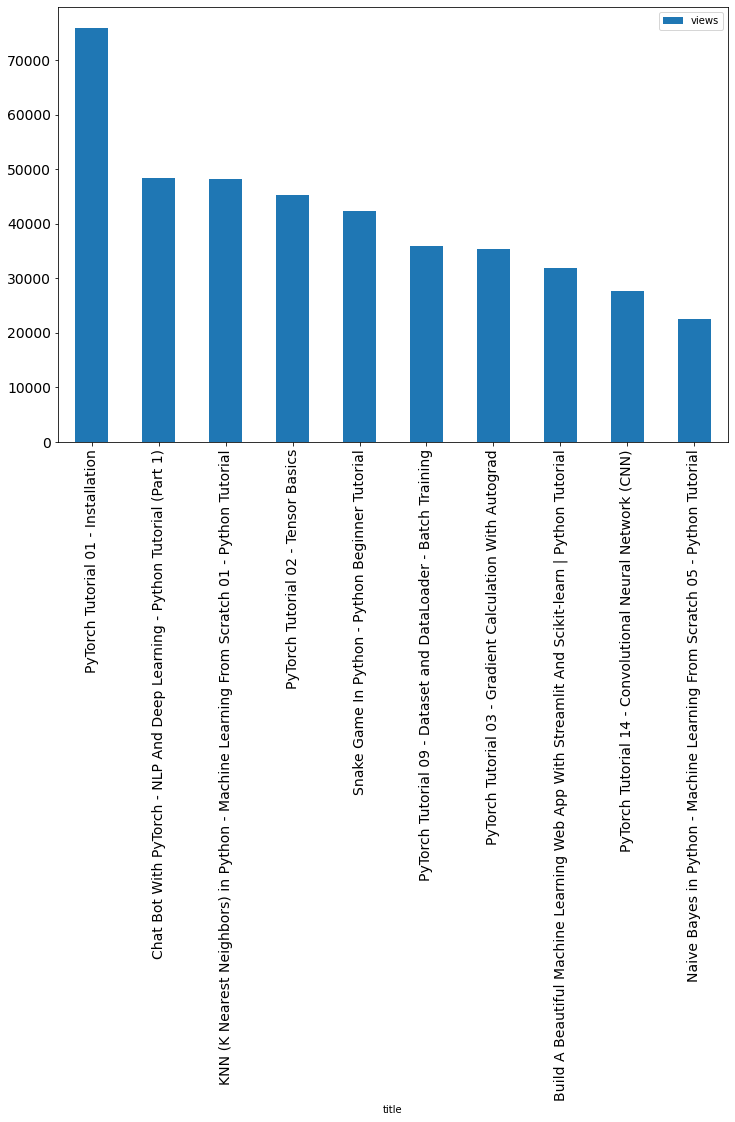

In [ ]:
top10 = df.head(10)
ax = top10.plot.bar(x="title", y="views", figsize=(12,8), fontsize=14)

## PLOT LESS 10 POPULAR VIDEOS

Ahora se dibuja los videos con menos vistas, los ultimos 10

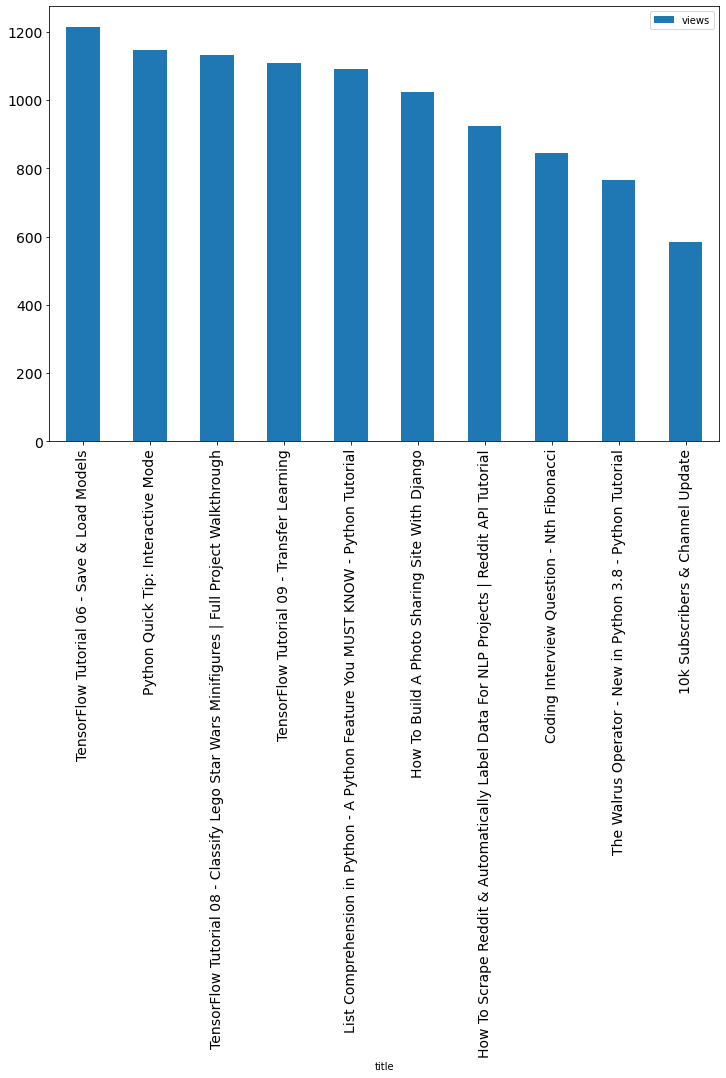

In [ ]:
bottom10 = df.tail(10)
ax = bottom10.plot.bar(x="title", y="views", figsize=(12,8), fontsize=14)

## ANALIZANDO LOS LIKES Y DISLIKES

In [ ]:
likes_avg = top10["likes"].mean()
dislikes_avg = top10["dislikes"].mean()
comments_avg = top10["likes"].mean()

print("Top 10", "\nAverage", "\nlikes", likes_avg, "\ndislikes", dislikes_avg, "\ncomments", comments_avg, "\n")

likes_avg = bottom10["likes"].mean()
dislikes_avg = bottom10["dislikes"].mean()
comments_avg = bottom10["likes"].mean()

print("Botton10", "\nAverage", "\nlikes", likes_avg, "\ndislikes", dislikes_avg, "\ncomments", comments_avg,)


Top 10 
Average 
likes 692.2 
dislikes 15.2 
comments 692.2 

Botton10 
Average 
likes 55.0 
dislikes 0.7 
comments 55.0


# SUGERENCIA FINALES DEL VIDEO

Intentar analizar los demas datos, con la descripcion de los videos, con los tag, etc, etc, para saber como funciona el algoritmo de YouTube etc

#BIBLIOGRAFIA
[YouTube Data API - Python Tutorials del Canal de YouTube Python Engenieer](https://www.youtube.com/playlist?list=PLqnslRFeH2UpC8EqlF2aax9A-VLiPDwxP)